# Assignment - Analyzing the IMDB Top 1000 Movies

In the next few assignments, you will be working with this data set of IMDB top 1000 movies. 

Source: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
import pandas as pd
import numpy as np 

In [2]:
# Read the data file "imdb_top_1000.csv" to a dataframe named "imdb"
imdb = pd.read_csv('../data/imdb_top_1000.csv', header=0)
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Describe the dataframe using the info() method.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# List all the column names: 
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Part 1: Data Manipulation

In [5]:
# Display top 10 movies's title, released year and IMDB rating.
imdb[['Series_Title', 'Released_Year', 'IMDB_Rating']].head(10)

,Series_Title,Released_Year,IMDB_Rating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather: Part II,1974,9.0
4,12 Angry Men,1957,9.0
5,The Lord of the Rings: The Return of the King,2003,8.9
6,Pulp Fiction,1994,8.9
7,Schindler's List,1993,8.9
8,Inception,2010,8.8
9,Fight Club,1999,8.8


In [6]:
# Display moviess ranked 11-20. 
# Show their title, released year and IMDB rating.
imdb.iloc[11:21].sort_values('IMDB_Rating', ascending = False)[['Series_Title','Released_Year', 'IMDB_Rating']]

,Series_Title,Released_Year,IMDB_Rating
11,Forrest Gump,1994,8.8
12,"Il buono, il brutto, il cattivo",1966,8.8
13,The Lord of the Rings: The Two Towers,2002,8.7
14,The Matrix,1999,8.7
15,Goodfellas,1990,8.7
16,Star Wars: Episode V - The Empire Strikes Back,1980,8.7
17,One Flew Over the Cuckoo's Nest,1975,8.7
18,Hamilton,2020,8.6
19,Gisaengchung,2019,8.6
20,Soorarai Pottru,2020,8.6


In [7]:
# Select all movies directed by Quentin Tarantino.
# Show their title, released year, IMDB rating, and gross.
imdb[(imdb.Director == 'Quentin Tarantino')][['Series_Title', 'Released_Year', 'IMDB_Rating', 'Gross']]

,Series_Title,Released_Year,IMDB_Rating,Gross
6,Pulp Fiction,1994,8.9,"107,928,762"
62,Django Unchained,2012,8.4,"162,805,434"
93,Inglourious Basterds,2009,8.3,"120,540,719"
103,Reservoir Dogs,1992,8.3,"2,832,029"
241,Kill Bill: Vol. 1,2003,8.1,"70,099,045"
369,Kill Bill: Vol. 2,2004,8.0,"66,208,183"
584,The Hateful Eight,2015,7.8,"54,117,416"
879,Once Upon a Time... in Hollywood,2019,7.6,"142,502,728"


In [8]:
# Select all R rated movies with IMDB_Rating>=8.5
# Show their title, released year, certificate, and IMDB rating.
imdb[(imdb.Certificate=='R') & (imdb.IMDB_Rating>=8.5)][['Series_Title', 'Released_Year', 'Certificate', 'IMDB_Rating']]

,Series_Title,Released_Year,Certificate,IMDB_Rating
24,Saving Private Ryan,1998,R,8.6
38,The Pianist,2002,R,8.5
40,American History X,1998,R,8.5


In [9]:
# How many unique values are there in the column "Released_Year"? 
# Hint: nuniuqe()
imdb.Released_Year.nunique()

100

In [10]:
# Count the number of movies in each "Released_Year"? 
# Hint: value_counts()
imdb.Released_Year.value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [11]:
# In this dataset, there is a movie with an error in "Released_Year". 
# Hint: Released_Year should be a 4-digit integer but this movie's is not. 
# Find this movie. 
imdb[imdb.Released_Year=='PG']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [12]:
# Correct the values for the corresponding columns ("Release_Year" and "Certificate"). 
# You may want to look up this movie on www.imdb.com. 
# Hint: You can set value for a particular set by: df.loc[row_name, column_name] = new_value
imdb.loc[966, 'Released_Year'] = 1995
imdb.loc[966, 'Certificate'] = 'PG'

In [13]:
# Change the data type of "Released_Year" to int
imdb['Released_Year'] = imdb['Released_Year'].apply(int)

In [14]:
# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, certificate, and IMDB rating.
imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)][['Series_Title', 'Released_Year', 'Certificate', 'IMDB_Rating']]

,Series_Title,Released_Year,Certificate,IMDB_Rating
8,Inception,2010,UA,8.8
18,Hamilton,2020,PG-13,8.6
19,Gisaengchung,2019,A,8.6
20,Soorarai Pottru,2020,U,8.6
21,Interstellar,2014,UA,8.6
33,Joker,2019,A,8.5
34,Whiplash,2014,A,8.5
35,The Intouchables,2011,UA,8.5


In [15]:
# Select all movies whose genres contain 'Animation'
imdb[imdb.Genre.str.contains('Animation')]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,2001,U,125 min,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,"10,055,859"
43,https://m.media-amazon.com/images/M/MV5BYTYxNG...,The Lion King,1994,U,88 min,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,88.0,Roger Allers,Rob Minkoff,Matthew Broderick,Jeremy Irons,James Earl Jones,942045,"422,783,777"
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
56,https://m.media-amazon.com/images/M/MV5BODRmZD...,Kimi no na wa.,2016,U,106 min,"Animation, Drama, Fantasy",8.4,Two strangers find themselves linked in a biza...,79.0,Makoto Shinkai,Ryûnosuke Kamiki,Mone Kamishiraishi,Ryô Narita,Aoi Yûki,194838,"5,017,246"
58,https://m.media-amazon.com/images/M/MV5BMjMwND...,Spider-Man: Into the Spider-Verse,2018,U,117 min,"Animation, Action, Adventure",8.4,Teen Miles Morales becomes the Spider-Man of h...,87.0,Bob Persichetti,Peter Ramsey,Rodney Rothman,Shameik Moore,Jake Johnson,375110,"190,241,310"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,https://m.media-amazon.com/images/M/MV5BODkxNG...,Mulan,1998,U,88 min,"Animation, Adventure, Family",7.6,"To save her father from death in the army, a y...",71.0,Tony Bancroft,Barry Cook,Ming-Na Wen,Eddie Murphy,BD Wong,256906,"120,620,254"
971,https://m.media-amazon.com/images/M/MV5BMTY5Nj...,Omohide poro poro,1991,U,118 min,"Animation, Drama, Romance",7.6,A twenty-seven-year-old office worker travels ...,90.0,Isao Takahata,Miki Imai,Toshirô Yanagiba,Yoko Honna,Mayumi Izuka,27071,"453,243"
976,https://m.media-amazon.com/images/M/MV5BN2JlZT...,The Little Mermaid,1989,U,83 min,"Animation, Family, Fantasy",7.6,A mermaid princess makes a Faustian bargain in...,88.0,Ron Clements,John Musker,Jodi Benson,Samuel E. Wright,Rene Auberjonois,237696,"111,543,479"
986,https://m.media-amazon.com/images/M/MV5BMzZiOD...,Watership Down,1978,U,91 min,"Animation, Adventure, Drama",7.6,Hoping to escape destruction by human develope...,64.0,Martin Rosen,John Hubley,John Hurt,Richard Briers,Ralph Richardson,33656,NaN


In [16]:
# Create a new dataframe called "stars" including the following columns: 
# Series_Title, Released_Year, Star1, Star2, Star3, Star4
stars = imdb[['Series_Title', 'Released_Year', 'Star1', 'Star2', 'Star3', 'Star4']]

In [17]:
# Create a new dataframe called "genres" including the following columns: 
# Series_Title, Released_Year, Genre.
genres = imdb[['Series_Title', 'Released_Year', 'Genre']]

In [18]:
# Sorting:
# Sort dataframe genres in ascending order of "Released_Year"
genres.sort_values('Released_Year')

,Series_Title,Released_Year,Genre
321,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery"
127,The Kid,1921,"Comedy, Drama, Family"
568,Nosferatu,1922,"Fantasy, Horror"
194,Sherlock Jr.,1924,"Action, Comedy, Romance"
193,The Gold Rush,1925,"Adventure, Comedy, Drama"
...,...,...,...
20,Soorarai Pottru,2020,Drama
205,Soul,2020,"Animation, Adventure, Comedy"
613,Druk,2020,"Comedy, Drama"
464,Dil Bechara,2020,"Comedy, Drama, Romance"


In [19]:
# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, Certificate, and gross.
# Sort them in descending order of "Gross"
(imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)].sort_values('Gross', ascending=False)
[['Series_Title', 'Released_Year', 'Certificate', 'Gross']])

,Series_Title,Released_Year,Certificate,Gross
19,Gisaengchung,2019,A,"53,367,844"
33,Joker,2019,A,"335,451,311"
8,Inception,2010,UA,"292,576,195"
21,Interstellar,2014,UA,"188,020,017"
35,The Intouchables,2011,UA,"13,182,281"
34,Whiplash,2014,A,"13,092,000"
18,Hamilton,2020,PG-13,NaN
20,Soorarai Pottru,2020,U,NaN


In [20]:
# Does the sorting result looks right to you? What's the problem? 
#the first movie should be highest gross but it isn't

In [21]:
# Resolve this problem of "Gross" and convert its data type to float
# Hint: You may find this webpage useful: 
# https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe
imdb['Gross'] = imdb['Gross'].str.replace(',', "")
imdb['Gross'] = imdb['Gross'].str.replace(' ', "")
imdb['Gross'] = imdb['Gross'].apply(float)

In [22]:
# Next, redo the sorting on Gross

# Select all movies released after (>=) 2010 and with IMDB_Rating>=8.5
# Show their title, released year, Certificate, and gross.
# Sort them in descending order of "Gross"
(imdb[(imdb.Released_Year>=2010) & (imdb.IMDB_Rating>=8.5)].sort_values('Gross', ascending=False)
[['Series_Title', 'Released_Year', 'Certificate', 'Gross']])

,Series_Title,Released_Year,Certificate,Gross
33,Joker,2019,A,335451311.0
8,Inception,2010,UA,292576195.0
21,Interstellar,2014,UA,188020017.0
19,Gisaengchung,2019,A,53367844.0
35,The Intouchables,2011,UA,13182281.0
34,Whiplash,2014,A,13092000.0
18,Hamilton,2020,PG-13,NaN
20,Soorarai Pottru,2020,U,NaN


In [23]:
# Add a new column "Runtime_min" by removing the substring ' min" in "Runtime"
# Set its data type as int
# Hint: https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe
imdb['Runtime_min'] = imdb['Runtime'].str[:3]
imdb

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,115
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,201
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,118
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,97


In [24]:
# Add a new column "Age_Year" by expression: 2021 - Released_Year
imdb['Age_Year'] = 2023 - imdb['Released_Year']
imdb

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,29
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175,51
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152,15
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202,49
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,96,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,115,62
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,201,67
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,118,70
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,97,79


In [25]:
# Add a new column "Decade" with values as 1980, 1990, 2000, 2010, 2020, etc. 
imdb['Decade'] = imdb['Released_Year'].apply(lambda x: str(x)[:3] + '0s')
imdb

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Age_Year,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,29,1990s
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175,51,1970s
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152,15,2000s
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202,49,1970s
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,96,66,1950s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,115,62,1960s
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,201,67,1950s
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,118,70,1950s
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,97,79,1940s


## Part 2: Data Summarization

In [26]:
# Total "Gross" of all top 1000 movies
imdb['Gross'].sum()

56536877976.0

In [27]:
# Average "No_of_Votes" of all movies
imdb['No_of_Votes'].mean()

273692.911

In [28]:
# Count movies in each decade (e.g., ..., 1980, 1990, 2000, 2010, 2020)
# Sort decades by the number of movies in descending order
imdb.groupby('Decade')['Series_Title'].count().sort_values(ascending=False)

Decade
2010s    242
2000s    237
1990s    151
1980s     89
1970s     76
1960s     73
1950s     56
1940s     35
1930s     24
1920s     11
2020s      6
Name: Series_Title, dtype: int64

In [29]:
# Count movies by different directors.
# Show the top 10 directors with the most movies in this list
imdb.groupby('Director')['Series_Title'].count().sort_values(ascending=False)

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Jessie Nelson        1
Jeong-beom Lee       1
Jemaine Clement      1
Jeethu Joseph        1
Ömer Faruk Sorak     1
Name: Series_Title, Length: 548, dtype: int64

In [30]:
# For each director, calculate the number of movies, average IMDB_Rating, and total gross. 
# Ranked in descending order of total gross
# Show the top 10 directors with the most gross
(imdb.groupby('Director').agg({'Series_Title':'count', 'IMDB_Rating':'mean', 'Gross':'sum'})
 .sort_values('Gross', ascending=False).head(10))

,Series_Title,IMDB_Rating,Gross
Director,,,
Steven Spielberg,13,8.030769,2.478133e+09
Anthony Russo,4,8.075000,2.205039e+09
Christopher Nolan,8,8.462500,1.937454e+09
James Cameron,5,8.080000,1.748237e+09
Peter Jackson,5,8.400000,1.597312e+09
J.J. Abrams,3,7.833333,1.423171e+09
Brad Bird,4,7.900000,1.099628e+09
Robert Zemeckis,5,8.120000,1.049446e+09
David Yates,3,7.800000,9.789537e+08


In [31]:
# Group movies by decade and director 
# In each group (i.e., for each decade and each director), 
# calculate the number of movies and average IMDB rating.
# Sort in descending order of movie count
(imdb.groupby(['Decade', 'Director']).agg({'Series_Title':'count', 'IMDB_Rating':'mean'})
.sort_values('Series_Title', ascending=False)
)

Series_Title  IMDB_Rating
Decade Director                                    
1950s  Billy Wilder                  6     8.133333
2000s  Clint Eastwood                5     7.940000
1950s  Akira Kurosawa                5     8.260000
1980s  Steven Spielberg              5     7.980000
1950s  Alfred Hitchcock              5     8.220000
...                                ...          ...
1990s  Jonathan Lynn                 1     7.600000
       Kaige Chen                    1     8.100000
       Kenneth Branagh               1     7.700000
       Kevin Altieri                 1     7.800000
2020s  Thomas Vinterberg             1     7.800000

[749 rows x 2 columns]

In [32]:
# Bonus Question 1: 
# Find the top 3 highest rated movie of each year since 2010. 
# Show their released year, ranking, title, and IMDB_Rating.
# Sort them in descending order of year and ascending order of ranking
imdb['rank_movies_since_2010'] = imdb.groupby(['Released_Year'])['IMDB_Rating'].rank(ascending=False)
(imdb[(imdb.rank_movies_since_2010<=3) & (imdb.Released_Year>=2010)].sort_values(by=['Released_Year', 'rank_movies_since_2010'],
                                                                                ascending=[False,True])
 [['Released_Year', 'rank_movies_since_2010', 'Series_Title', 'IMDB_Rating']])

,Released_Year,rank_movies_since_2010,Series_Title,IMDB_Rating
18,2020,1.5,Hamilton,8.6
20,2020,1.5,Soorarai Pottru,8.6
205,2020,3.0,Soul,8.1
19,2019,1.0,Gisaengchung,8.6
33,2019,2.0,Joker,8.5
59,2019,3.0,Avengers: Endgame,8.4
53,2018,2.0,Capharnaüm,8.4
58,2018,2.0,Spider-Man: Into the Spider-Verse,8.4
60,2018,2.0,Avengers: Infinity War,8.4
54,2017,2.0,Ayla: The Daughter of War,8.4


In [33]:
# Bonus Question 2: 
# Find all directors whose movies appeared in at least five different decades. 
# Your result should include: director, decade, and the number of movies in the decade.
df_1 = imdb.groupby(['Director', 'Decade']).agg({'Series_Title':'count'}).reset_index()
df_1.groupby(['Director']).filter(lambda x: x['Director'].count()>= 5 )

,Director,Decade,Series_Title
247,Hayao Miyazaki,1970s,1
248,Hayao Miyazaki,1980s,4
249,Hayao Miyazaki,1990s,2
250,Hayao Miyazaki,2000s,3
251,Hayao Miyazaki,2010s,1
424,Martin Scorsese,1970s,1
425,Martin Scorsese,1980s,3
426,Martin Scorsese,1990s,2
427,Martin Scorsese,2000s,1
428,Martin Scorsese,2010s,3


## Part 3. Data Visualization

You need to complete all data processing/manipulation steps above before visualization. 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-v0_8-bright') 
import seaborn as sns

<Axes: xlabel='IMDB_Rating', ylabel='Meta_score'>

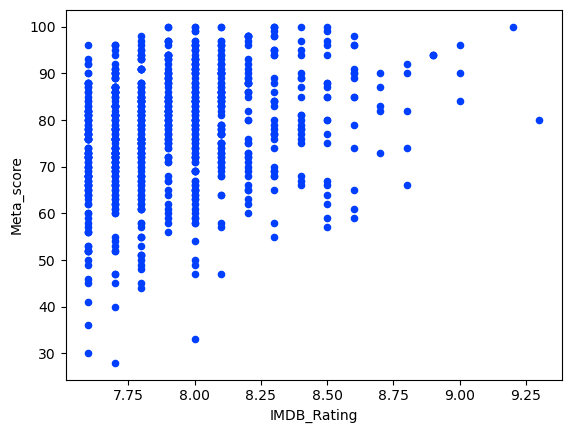

In [35]:
# Create a scatterplot to show the two scores "IMDB_Rating" and "Meta_score"
# What can you tell about this pair of scores? 
imdb.plot.scatter(x='IMDB_Rating', y='Meta_score')
#as imdb_rating gets higher, the meta_score gets higher

<Axes: xlabel='IMDB_Rating', ylabel='Meta_score'>

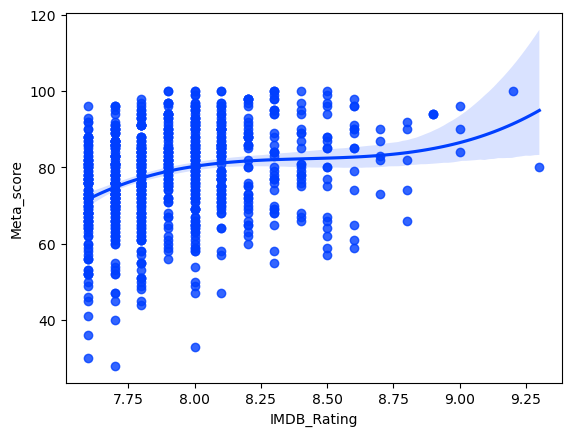

In [36]:
# Fit a trendline to show the relationship between the two scores
# Hint: sns.regplot()
# Try different order for the trendline
sns.regplot(data=imdb, x='IMDB_Rating', y='Meta_score', order=3)

In [37]:
# Do any of the data points in the scatterplot surprise you? 
# Try to identify a couple of such movies. 
#there is a movie with an imdb rating higher than 9.25 but the meta score is lower than lower imdb ratings.
imdb[(imdb.IMDB_Rating >= 9)][['Series_Title', 'IMDB_Rating', 'Meta_score']].sort_values('Meta_score', ascending=False)

,Series_Title,IMDB_Rating,Meta_score
1,The Godfather,9.2,100.0
4,12 Angry Men,9.0,96.0
3,The Godfather: Part II,9.0,90.0
2,The Dark Knight,9.0,84.0
0,The Shawshank Redemption,9.3,80.0


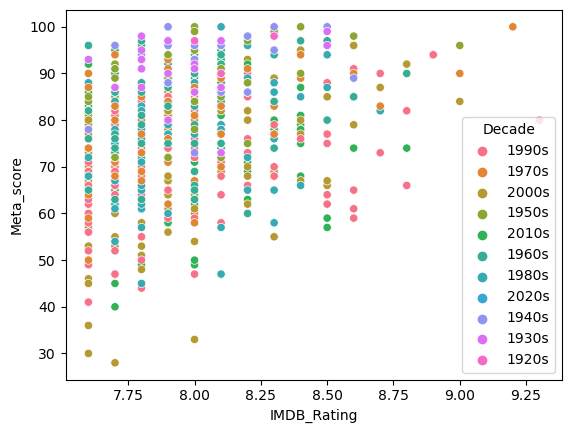

In [38]:
# In the scatterplot, use color to differentiate movies from different decade. 
c = sns.scatterplot(data=imdb, x='IMDB_Rating', y='Meta_score', hue='Decade')

<Axes: xlabel='Decade', ylabel='count'>

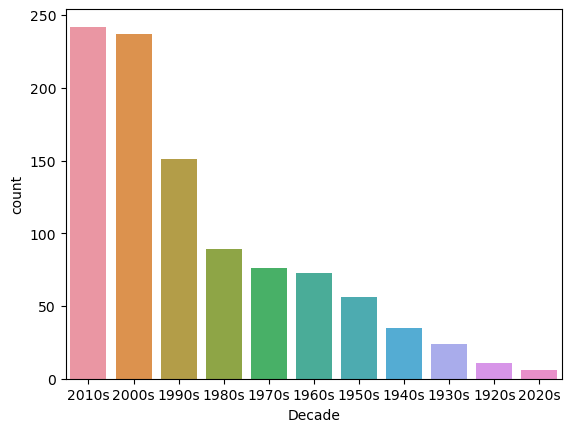

In [39]:
# Create a chart to show the number of movies in each decade
order = imdb['Decade'].value_counts(ascending=False).index
sns.countplot(data=imdb, x='Decade', order=order)

<Axes: ylabel='Decade'>

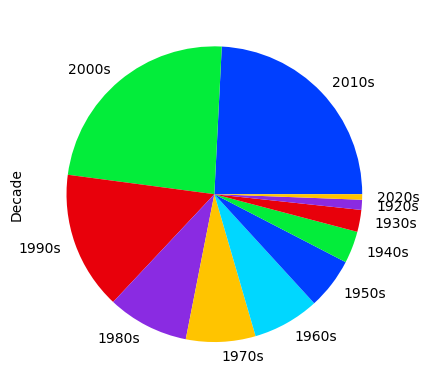

In [40]:
# Create a chart to show the percentage of movies in each decade
imdb.Decade.value_counts().plot(kind='pie')

<Axes: xlabel='Director', ylabel='count'>

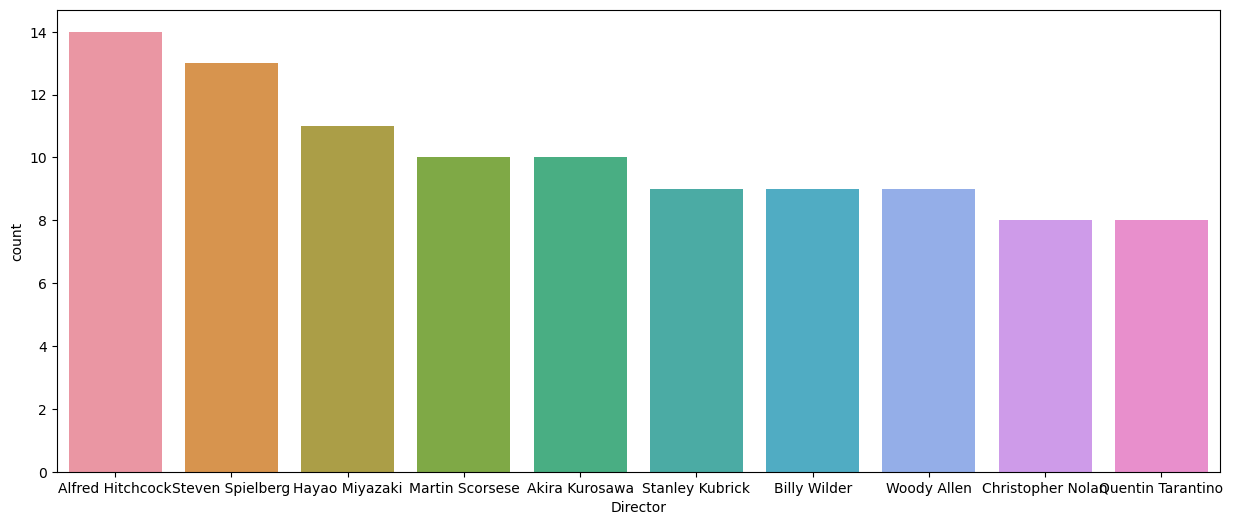

In [41]:
# Count movies by different director.
# Show the top 10 directors with the most movies in a bar chart. 
order = imdb['Director'].value_counts().sort_values(ascending=False)
order2 = order.head(10).index
plt.figure(figsize=(15,6))
sns.countplot(data=imdb, x='Director', order=order2)

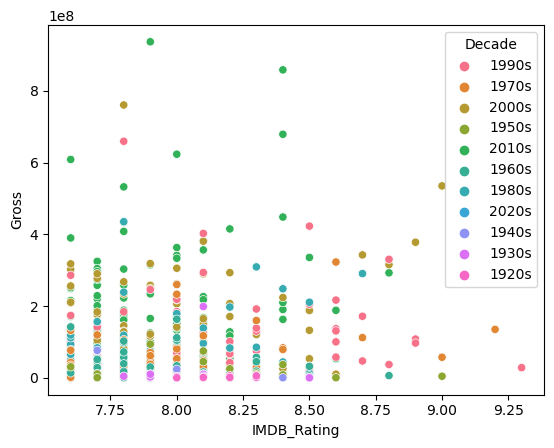

In [42]:
# Create a scatterplot of "IMDB_Rating" and "Gross" 
# Use color to differentiate movies from different decades
# What can you tell from the chart? 
a = sns.scatterplot(data=imdb, x='IMDB_Rating', y='Gross', hue='Decade')
#it seems that as imdb rating increases, the gross decreases

<Axes: ylabel='Drama'>

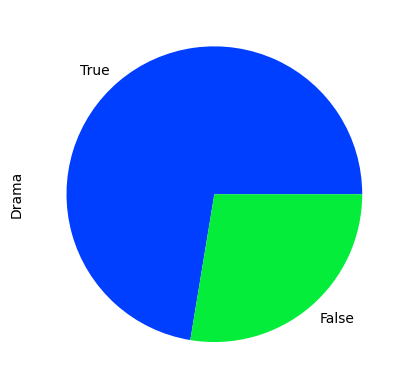

In [43]:
# Create a column (variable) called "Drama" to indicate if a movie's genres contain "Drama"
# Create a pie chart to show the composition
imdb['Drama'] = imdb['Genre'].apply(lambda x: 'Drama' in x)
imdb.Drama.value_counts().plot(kind='pie')

<Axes: xlabel='Decade', ylabel='Gross'>

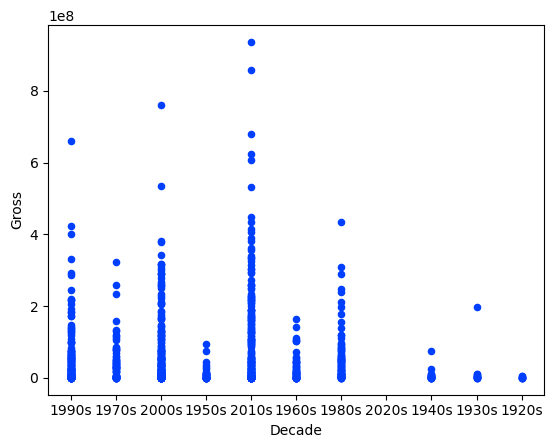

In [44]:
# Create a plot to compare the gross of movies across decades
imdb.plot.scatter(x='Decade', y='Gross')

<Axes: xlabel='Gross', ylabel='Count'>

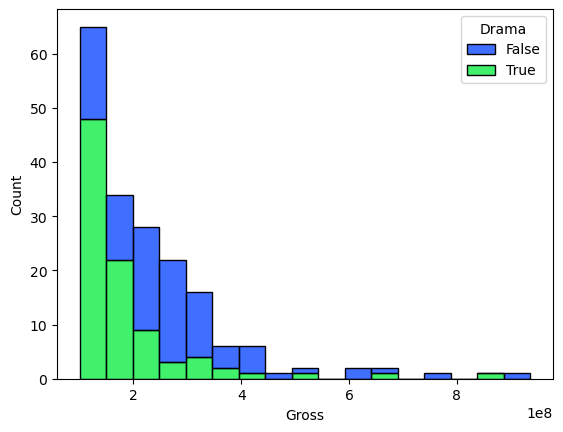

In [45]:
# For movies that gross over $100 million dollors 
# Create a histogram of gross for drama vs. non-drama movies
high_gross_movies = imdb[imdb.Gross > 100000000]
sns.histplot(data=high_gross_movies, x='Gross', hue='Drama', multiple='stack')

<Axes: xlabel='Decade', ylabel='No_of_Votes'>

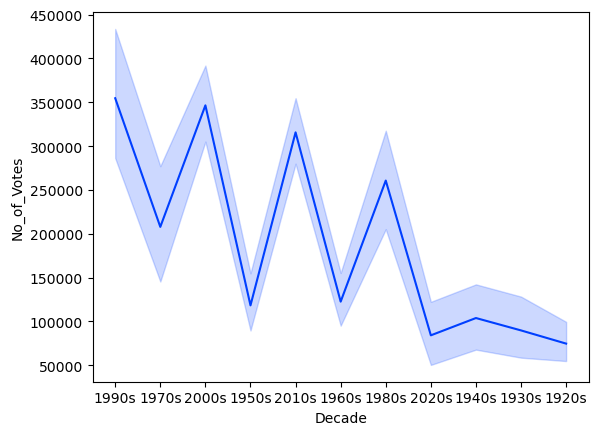

In [46]:
# Question 1: Compare number of votes over the decades
sns.lineplot(data=imdb, x='Decade', y='No_of_Votes')

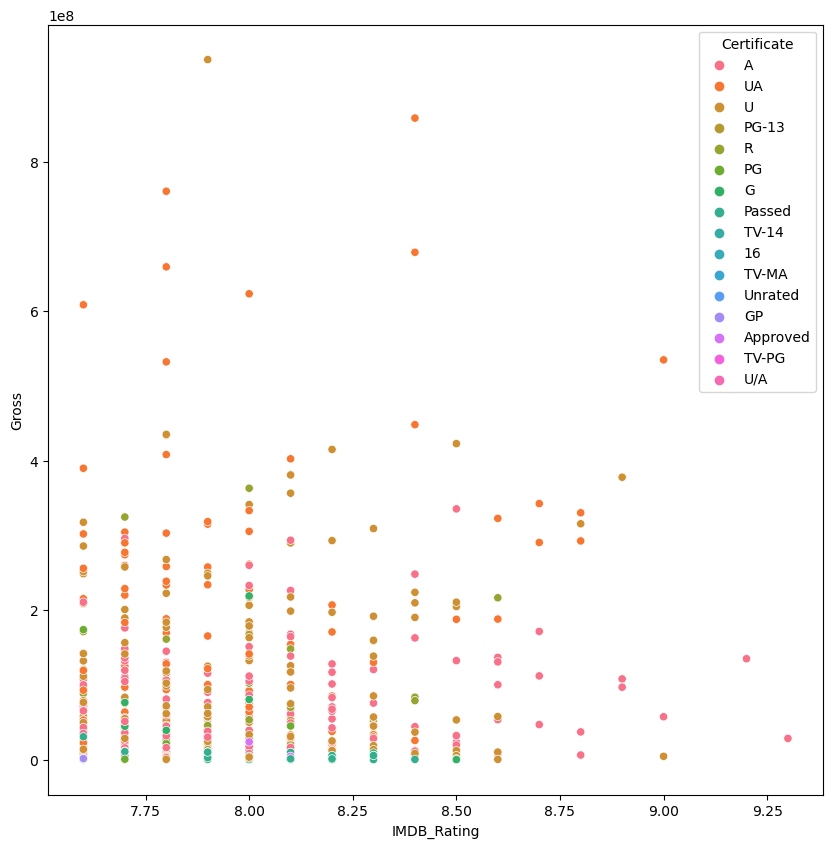

In [49]:
# Question 2: How does imdb rating compare with gross in different certificates?
plt.figure(figsize=(10,10))
e = sns.scatterplot(data=imdb, x='IMDB_Rating', y='Gross', hue='Certificate')